# Modelo Black-Scholes

Objetivo General
 - Utilizar el modelo matemático de Black - Scholes para la toma de decisiones financieras.

Objetivos Específico
 - Determinar el costo de una acción usando el modelo Black - Scholes

## Modelo que representa el problema

### Supuestos

>- No hay costes de transacción o impuestos.
>- La tasa de interés libre de riesgo es constante para todos los vencimientos.
>- La acción no paga dividendos.
>- La volatilidad se mantiene constante.
>- Se permite la venta en corto.
>- No hay oportunidades de arbitraje sin riesgo.
>- Asume que la distribución de probabilidad de los retornos es una distribución normal.

## Simulaciones

In [19]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
%matplotlib inline
import time 

In [20]:
def d1(S0, K, r, sigma, T):
    return (np.log(S0/K) + (r + sigma**2 / 2) * T)/(sigma * np.sqrt(T))

In [21]:
def d2(S0, K, r, sigma, T):
    return (np.log(S0 / K) + (r - sigma**2 / 2) * T) / (sigma * np.sqrt(T))

In [22]:
S0 = 50
K = 40
r=0.1
sigma = 0.30
T = 0.25
Otype='C'

In [23]:
print ("S0 = Precio de la accion en el tiempo 0:", S0)
print ("K = Precio fijo:", K)
print ("r = Tasa libre de riesgo:", r)
print ("sigma = Volatilidad del precio:", sigma)
print ("T = Periodo de vencimiento:", T)


S0 = Precio de la accion en el tiempo 0: 50
K = Precio fijo: 40
r = Tasa libre de riesgo: 0.1
sigma = Volatilidad del precio: 0.3
T = Periodo de vencimiento: 0.25


In [24]:
d1(S0 , K , r , sigma , T)

1.7292903420947319

In [25]:
d2(S0 , K , r , sigma , T)

1.579290342094732

In [26]:
def BlackScholes(type,S0, K, r, sigma, T):
    if type=="C":
        # Opcion C es una opcion de compra Europea
        return S0 * ss.norm.cdf(d1(S0, K, r, sigma, T)) - K * np.exp(-r * T) * ss.norm.cdf(d2(S0, K, r, sigma, T))
    else:
        return K * np.exp(-r * T) * ss.norm.cdf(-d2(S0, K, r, sigma, T)) - S0 * ss.norm.cdf(-d1(S0, K, r, sigma, T))

In [27]:
S0 = 50
K = 40
r=0.1
sigma = 0.30
T = 0.25
Otype='C'

In [28]:
print ("S0 = Precio de la accion en el tiempo 0:", S0)
print ("K = Precio fijo:", K)
print ("r = Tasa libre de riesgo:", r)
print ("sigma = Volatilidad del precio:", sigma)
print ("T = Periodo de vencimiento:", T)

S0 = Precio de la accion en el tiempo 0: 50
K = Precio fijo: 40
r = Tasa libre de riesgo: 0.1
sigma = Volatilidad del precio: 0.3
T = Periodo de vencimiento: 0.25


In [37]:
t=time.time()
BS = BlackScholes(Otype,S0, K, r, sigma, T)
elasticidad=time.time()-t
print ("Black-Scholes price:",BS)
print("Elasticidad" , elasticidad)

Black-Scholes price: 11.122637965052597
Elasticidad 0.002000570297241211


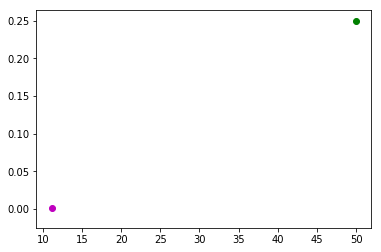

In [51]:
plt.scatter(BS,elasticidad, c = "m")
plt.scatter(S0,T, c = "g")


## Conclusiones 

En conclusión la Ecuacion de Black - Scholes no es efectiva a la hora de  hacer predicciones. Se acerca al precio de la acción, pero en la actualidad ya no es un modelo efectivo a menos que se cumplan todos los supuestos.

## Bibliografía 

MacBeth, J. D., & Merville, L. J. (1980). Tests of the Black‐Scholes and Cox call option valuation models. The Journal of Finance.